# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.Open-source ML library for Python. Built on NumPy, SciPy, and Matplotlib. ... Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms.

# Task 1 : Environment Set up

In [3]:
#import required libraries
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [4]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [5]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

the data from the column:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [6]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [8]:
# print top 5 observations
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We want first to check to see if we have missing data ,we use isnull().sum()

In [9]:
df_boston.isnull().sum() #sum to count of the NaN values For one column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

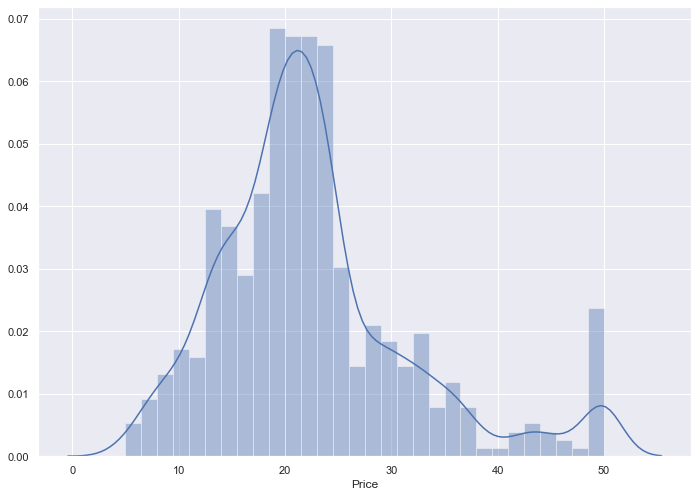

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})#. rc parameter set aesthetics of your plots 
# set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn set method:
sns.distplot(df_boston['Price'], bins=30)
plt.show()

#  Create a correlation matrix that measures the linear relationships between the variables
# A perfect negative correlation is represented by the value -1.0, while a 0 indicates no correlation, and +1.0 indicates a perfect positive correlation. A perfect negative correlation means the relationship that exists between two variables is exactly opposite all of the time.


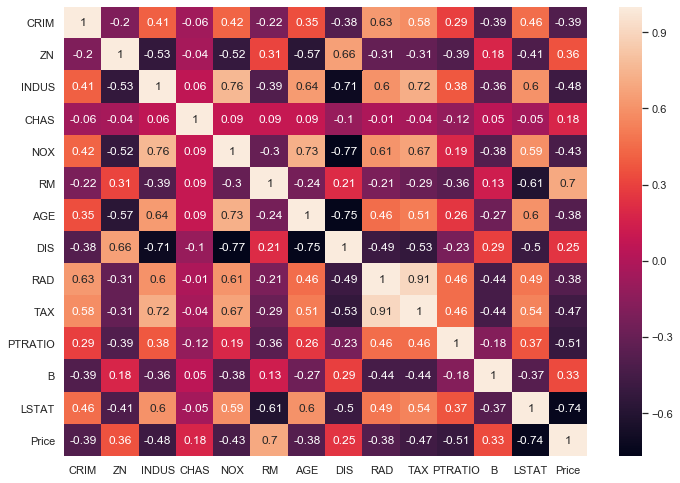

In [12]:
correlation_matrix = df_boston.corr().round(2)
#A correlation matrix is a table showing correlation coefficients between variables.
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix , annot = True )# put the numbers on

# Write Your Observations

* There is a positive corrlation with the Proportion of residential land zoned for lots over 25,000 sq. ft or ZN and the Weighted distances to five Boston employment centers or DIS.

* There is a very high correlation with the price and the average number of rooms per dwelling or RM and the amount of residential land for lots over 25,000 sq. ft.

* There is a large negative correlation with the price and the number of lower status population or LSTAT.

* There is large negative correlation with the Weighted distances to five Boston employment centers or DIS and the concentration of Nitric oxide or NOX. 



# Preparing the data for training the Machine Learning Model

In [15]:
# assign features on X axis 
X_features = boston_dataset.data

In [16]:
# assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

In [17]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [18]:
# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# The intercept is the expected mean value of y
# print the intercept 
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [20]:
# Regression coefficients represent the mean change in the response variable for one
# unit of change in the predictor variable while holding other predictors in the model constant
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 13 


# Model Training

In [21]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)

In [22]:
# print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [23]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [24]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Caluclate RMSE and R Square:

# RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

# R Square

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination,the higher r means ,the higher percentage of points the line passes through when the data points and line are plotted. If the coefficient is 0.80, then 80% of the points should fall within the regression line.The usefulness of R2 is its ability to find the likelihood of future events falling within the predicted outcomes. 


https://drive.google.com/file/d/1YPzOS2dbKIuVOuYWhCeP9HOs0WcWxGaK/view?usp=sharing


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
y_train_predict = lineReg.predict(X_train)

In [27]:
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

In [28]:
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.77071580520955
R2 score is 0.7251803230171584




In [29]:
# model evaluation for testing set

y_test_predict = lineReg.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.493100038384115
R2 score is 0.7708047268228013


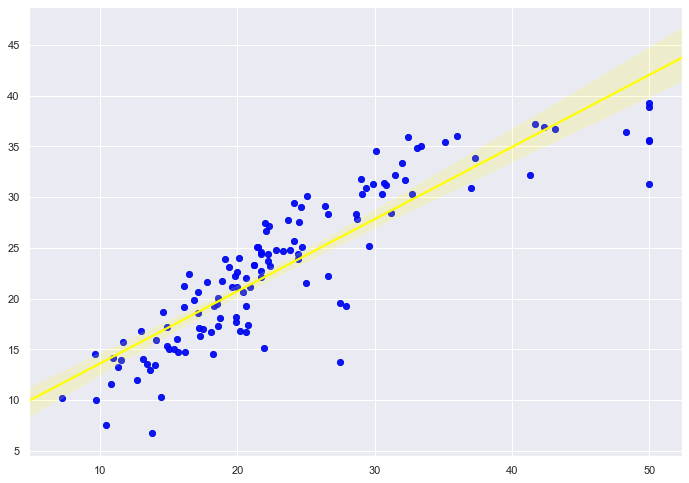

In [31]:
import pandas as pd
import seaborn as sns
# plotting the y_test vs y_pred
# ideally should have been a straight line

scatter=plt.scatter(Y_test, y_test_predict)
regplot=sns.regplot(Y_test, y_test_predict,data=scatter,
                    scatter_kws={"color": "blue"}, line_kws={"color": "yellow"} )

# Your Conclusion 

My Conclusion is that the model is very accurate in predicting with respect to the cluster of blue dot values in the graph even when there are outliers in the data.